In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\admin\\Desktop\\Machine Learning A-Z™ Hands-On Python & R In Data Science\\Machine Learning A-Z Template Folder\\Datasets\\Classification\\Bank Marketing\\bank-additional')

In [3]:
dataset = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [4]:
dataset.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
len(dataset[dataset.duplicated() == True])

12

In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
len(dataset[dataset.duplicated() == True])

0

In [10]:
dataset.job.nunique()

12

In [11]:
dataset.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
# pd.crosstab(dataset['y'], dataset['month'])

<AxesSubplot:xlabel='cons.conf.idx'>

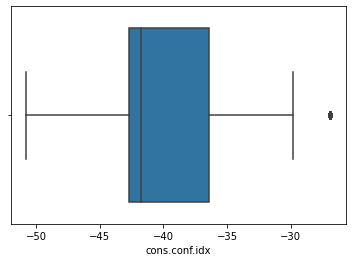

In [12]:
#sns.pairplot(dataset, hue='y')
sns.boxplot(data=dataset, x='cons.conf.idx')

In [13]:
dataset = dataset[dataset['cons.conf.idx'] < -30]

<AxesSubplot:xlabel='job', ylabel='count'>

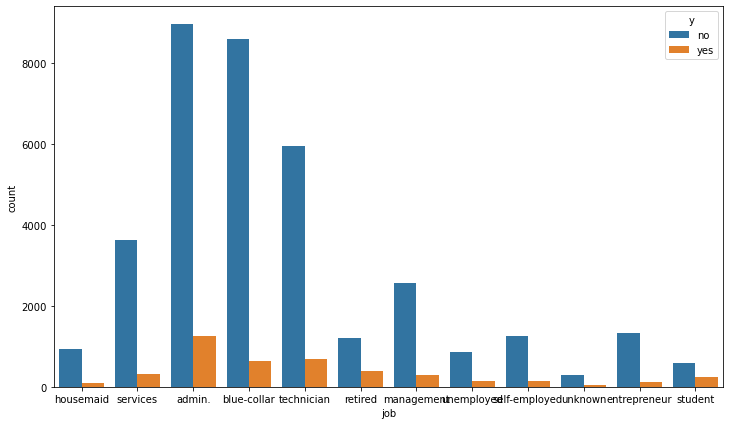

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(data=dataset, x='job', hue='y')

<AxesSubplot:xlabel='marital', ylabel='count'>

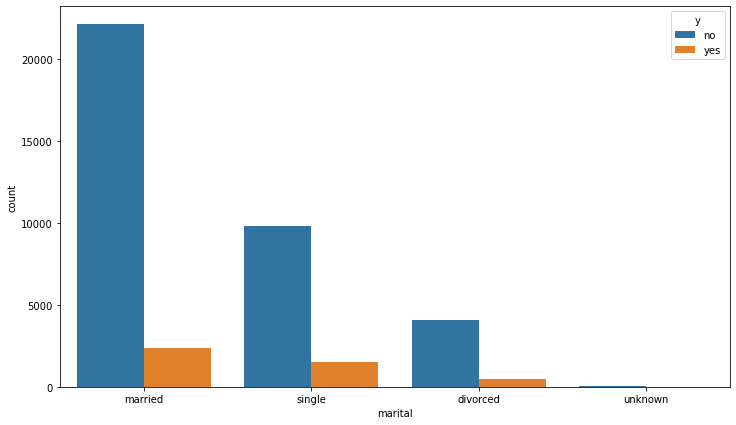

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(data=dataset, x='marital', hue='y')

<AxesSubplot:xlabel='education', ylabel='count'>

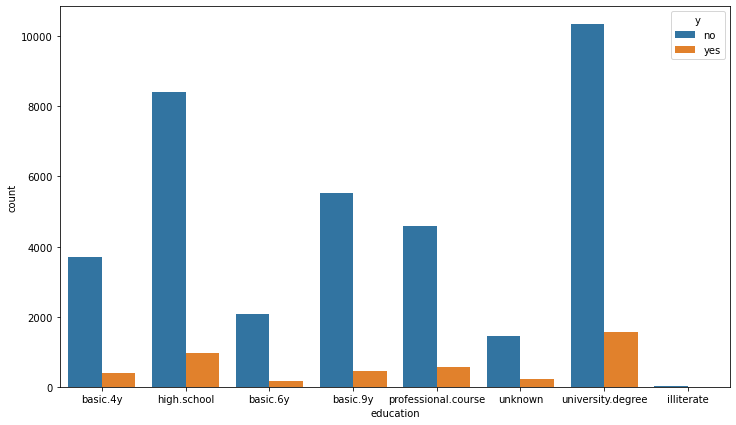

In [16]:
plt.figure(figsize=(12,7))
sns.countplot(data=dataset, x='education', hue='y')

<AxesSubplot:xlabel='default', ylabel='count'>

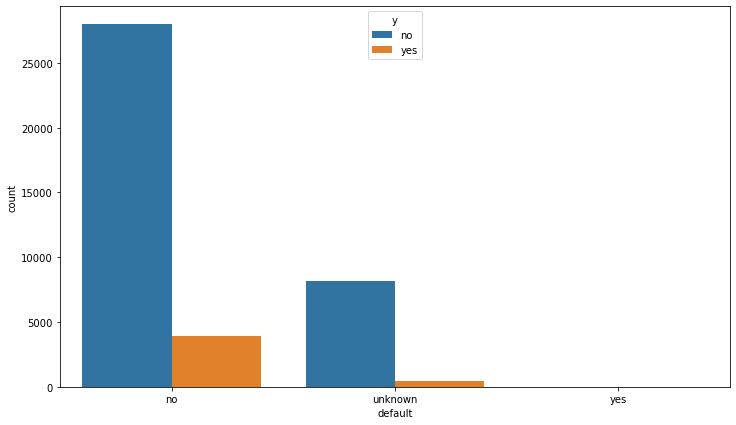

In [17]:
plt.figure(figsize=(12,7))
sns.countplot(data=dataset, x='default', hue='y')

<AxesSubplot:xlabel='housing', ylabel='count'>

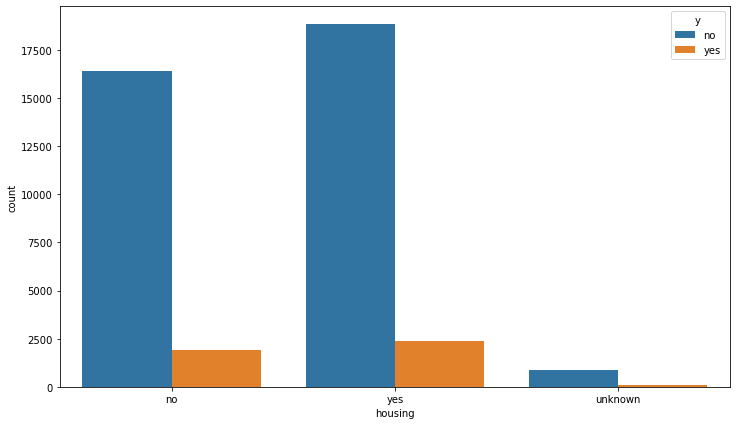

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(data=dataset, x='housing', hue='y')

<AxesSubplot:xlabel='loan', ylabel='count'>

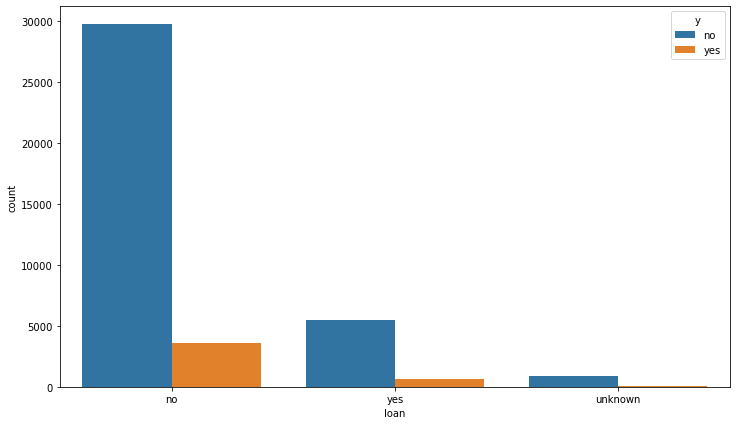

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(data=dataset, x='loan', hue='y')

<AxesSubplot:xlabel='contact', ylabel='count'>

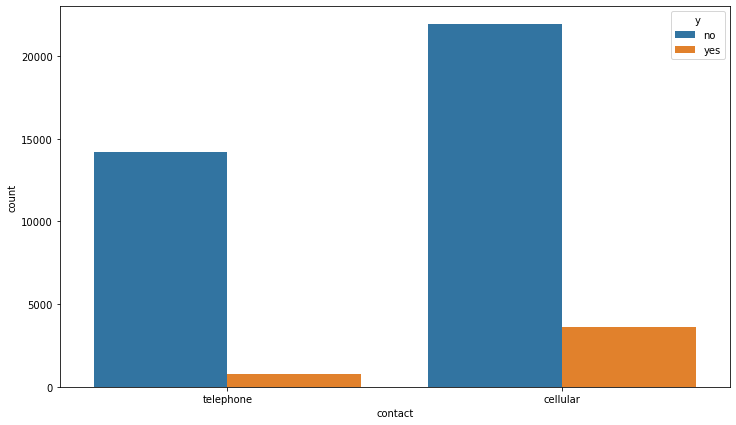

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(data=dataset, x='contact', hue='y')

<AxesSubplot:xlabel='month', ylabel='count'>

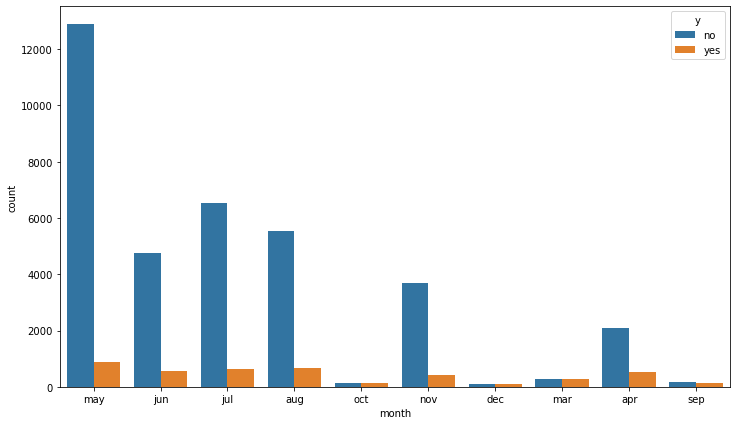

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(data=dataset, x='month', hue='y')

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

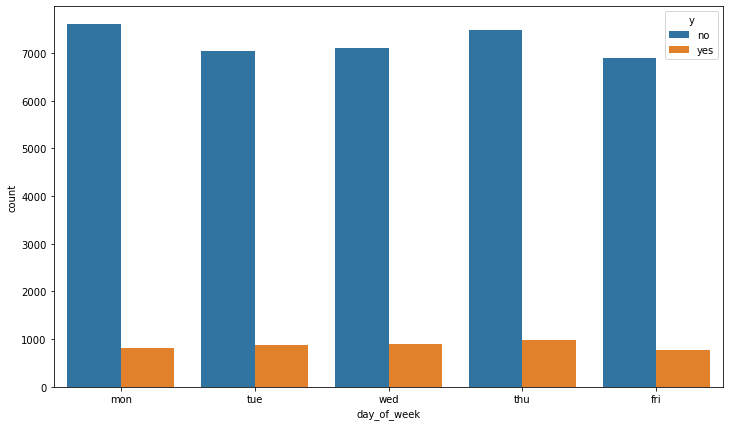

In [22]:
plt.figure(figsize=(12,7))
sns.countplot(data=dataset, x='day_of_week', hue='y')

In [23]:
dataset['duration'].nunique()

1536

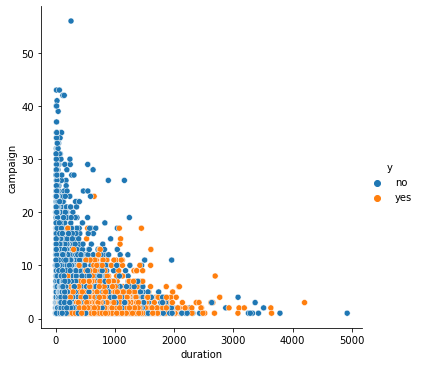

In [24]:
sns.relplot(data=dataset, x='duration', y='campaign', hue='y')

<AxesSubplot:>

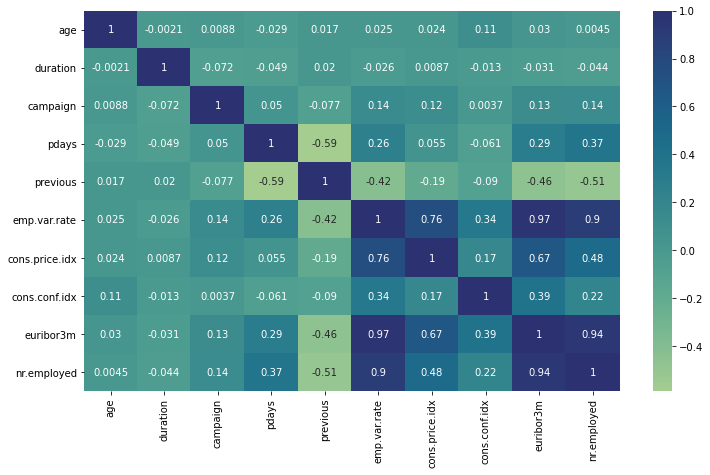

In [25]:
corr = dataset.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, cmap='crest')

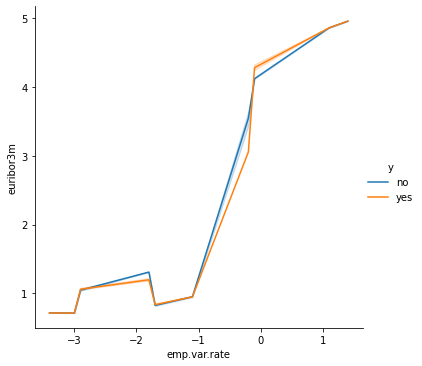

In [26]:
sns.relplot(data=dataset, x='emp.var.rate', y='euribor3m', hue='y', kind='line')

In [27]:
dataset.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [28]:
dataset = dataset.drop(columns=['euribor3m', 'nr.employed', 'cons.price.idx'])

In [29]:
corr = dataset.corr()

<AxesSubplot:>

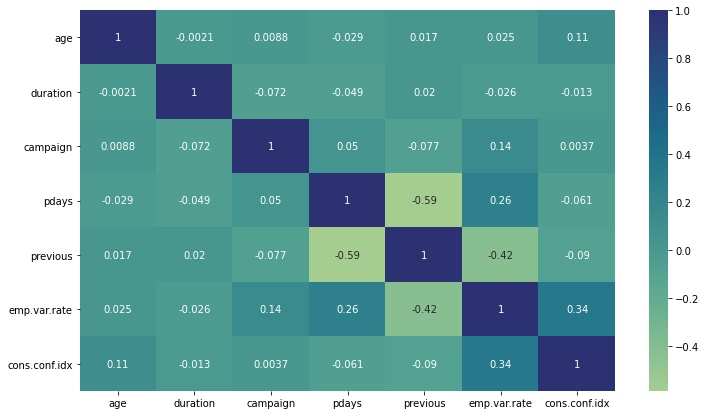

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, cmap='crest')

In [31]:
X = dataset.iloc[:, :17]
y = dataset.iloc[:, 17]

In [32]:
X = pd.get_dummies(data=X, columns=['job', 'marital', 'contact', 'month', 'day_of_week'], drop_first=True)

In [33]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X = encoder.fit_transform(X)

In [34]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,39.0,0.0,0.0,0.0,0.0,261.0,0.0,26.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,40.0,3.0,1.0,0.0,0.0,149.0,0.0,26.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,20.0,3.0,0.0,2.0,0.0,226.0,0.0,26.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23.0,1.0,0.0,0.0,0.0,151.0,0.0,26.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,39.0,3.0,0.0,0.0,2.0,307.0,0.0,26.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40458,56.0,5.0,0.0,2.0,0.0,334.0,0.0,26.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40459,29.0,5.0,0.0,0.0,0.0,383.0,0.0,26.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40460,39.0,6.0,0.0,2.0,0.0,189.0,1.0,26.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40461,27.0,5.0,0.0,0.0,0.0,442.0,0.0,26.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.preprocessing import LabelEncoder
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

In [36]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting should have been done before even exploring and analysing the data

In [38]:
from sklearn.linear_model import LogisticRegression
classifier_1 = LogisticRegression().fit(X_train, y_train)
y_pred = classifier_1.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7034,  169],
       [ 513,  377]], dtype=int64)

In [40]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_1, X=X_train, y=y_train, cv=10, n_jobs=-1)
accuracies.mean()

0.9130058696323757

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
y_pred = classifier_2.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7144,   59],
       [ 781,  109]], dtype=int64)

In [43]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_2, X=X_train, y=y_train, cv=10, n_jobs=-1)
accuracies.mean()

0.8966017917825149

In [44]:
from sklearn.naive_bayes import GaussianNB
classifier_3 = GaussianNB().fit(X_train, y_train)
y_pred = classifier_3.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6751,  452],
       [ 498,  392]], dtype=int64)

In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_3, X=X_train, y=y_train, cv=10, n_jobs=-1)
accuracies.mean()

0.881556997219648

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier_4 = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
y_pred = classifier_4.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6983,  220],
       [ 484,  406]], dtype=int64)

In [49]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_4, X=X_train, y=y_train, cv=10, n_jobs=-1)
accuracies.mean()

0.9167747914735866

In [50]:
'''from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': (10,50,100,200,300,400)}]
grid_search = GridSearchCV(estimator=classifier_4, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_'''

"from sklearn.model_selection import GridSearchCV\nparameters = [{'n_estimators': [10,50,100,200,300,400]}]\ngrid_search = GridSearchCV(estimator=classifier_4, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)\ngrid_search.fit(X_train, y_train)\nbest_parameters = grid_search.best_params_"